In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean

### Open example forecast from S2S database

In [8]:
ds = xr.open_dataset('../data/test_forecast.grib', engine='cfgrib')

### Visualize the content of the grib file with xarray

In [9]:
ds

<xarray.Dataset> Size: 267MB
Dimensions:     (number: 50, step: 46, latitude: 121, longitude: 240)
Coordinates:
  * number      (number) int64 400B 1 2 3 4 5 6 7 8 ... 43 44 45 46 47 48 49 50
    time        datetime64[ns] 8B ...
  * step        (step) timedelta64[ns] 368B 1 days 2 days ... 45 days 46 days
    surface     float64 8B ...
  * latitude    (latitude) float64 968B 90.0 88.5 87.0 ... -87.0 -88.5 -90.0
  * longitude   (longitude) float64 2kB 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
    valid_time  (step) datetime64[ns] 368B ...
Data variables:
    ci          (number, step, latitude, longitude) float32 267MB ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-07-17T15:18 GRIB to CDM+CF via cfgrib-0.9.1...

### Select two ensemble members (10, 30) at forecast day 45, and plot them

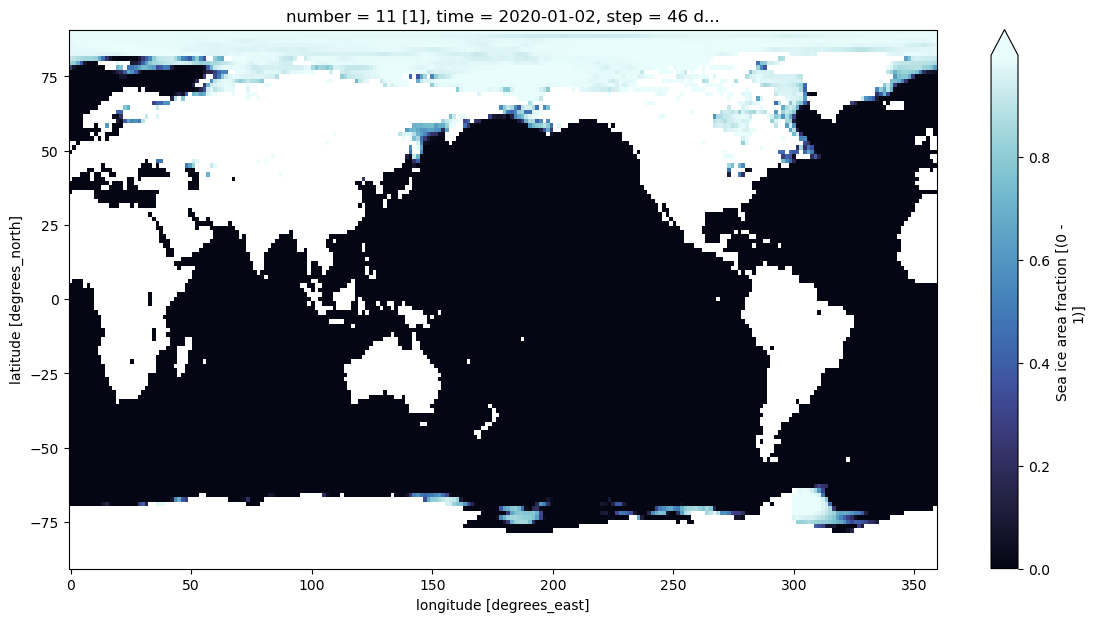

In [12]:
ds.ci.isel(number=10).isel(step=45).plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)

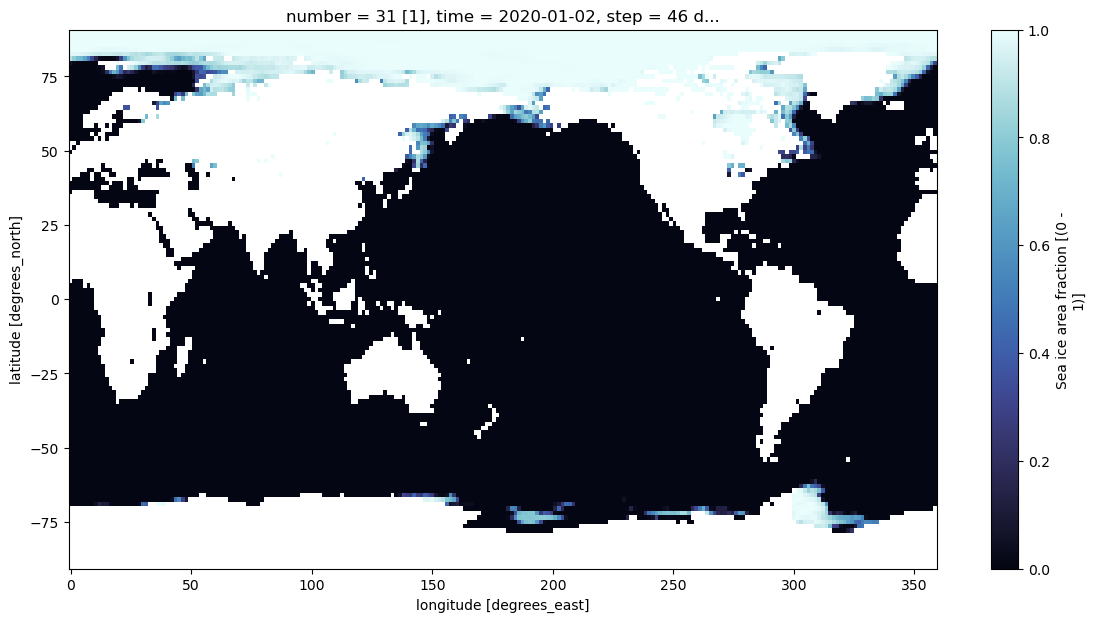

In [13]:
ds.ci.isel(number=30).isel(step=45).plot(x='longitude', y='latitude', cmap=cmocean.cm.ice, size=7, aspect=2, add_colorbar=True, robust=True)